In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as aq
import prepare as prep
import explore as ex


from sklearn.model_selection import train_test_split

#Settting matplotlib/seaborn defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [2]:
df = aq.get_crime_data(use_cache=True)

Using cached csv


In [3]:
df.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,y_coordinate,latitude,longitude,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,:@computed_region_qwte_z96m,clearance_status,clearance_date
0,20221411560,AGG ASSAULT,402,N,2022-05-21T23:28:00.000,2022-05-21T00:00:00.000,2328,2022-05-21T23:28:00.000,2022-05-21T00:00:00.000,2328,...,3130738.0,30.278679,-97.690473,"{'latitude': '30.27867944', 'longitude': '-97....",2864.0,1.0,8.0,NaN,NaN,NaN
1,20221411686,FAMILY DISTURBANCE,3400,N,2022-05-21T23:25:00.000,2022-05-21T00:00:00.000,2325,2022-05-21T23:25:00.000,2022-05-21T00:00:00.000,2325,...,3135376.0,30.379194,-97.673005,"{'latitude': '30.37919393', 'longitude': '-97....",3642.0,1.0,8.0,NaN,NaN,NaN
2,20221411618,DATING DISTURBANCE,2400,N,2022-05-21T23:17:00.000,2022-05-21T00:00:00.000,2317,2022-05-21T23:17:00.000,2022-05-21T00:00:00.000,2317,...,3107646.0,30.264380,-97.764029,"{'latitude': '30.26438022', 'longitude': '-97....",2859.0,5.0,1.0,1426.0,NaN,NaN
3,20221411720,PUBLIC INTOXICATION,2300,N,2022-05-21T23:07:00.000,2022-05-21T00:00:00.000,2307,2022-05-21T23:07:00.000,2022-05-21T00:00:00.000,2307,...,3112676.0,30.274588,-97.747819,"{'latitude': '30.27458791', 'longitude': '-97....",2856.0,9.0,10.0,NaN,C,2022-05-22T00:00:00.000
4,20221410653,CIVIL DISTURBANCE/DEMO,3402,N,2022-05-21T23:04:00.000,2022-05-21T00:00:00.000,2304,2022-05-21T23:04:00.000,2022-05-21T00:00:00.000,2304,...,3120273.0,30.234682,-97.724824,"{'latitude': '30.23468195', 'longitude': '-97....",3256.0,3.0,3.0,102.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_report_number       500000 non-null  int64  
 1   crime_type                   500000 non-null  object 
 2   ucr_code                     500000 non-null  int64  
 3   family_violence              500000 non-null  object 
 4   occ_date_time                500000 non-null  object 
 5   occ_date                     500000 non-null  object 
 6   occ_time                     500000 non-null  int64  
 7   rep_date_time                500000 non-null  object 
 8   rep_date                     500000 non-null  object 
 9   rep_time                     500000 non-null  int64  
 10  location_type                498329 non-null  object 
 11  address                      500000 non-null  object 
 12  zip_code                     497123 non-null  float64
 13 

## Limiting Time Frame
**We decided to limit the time frame of data to improve relevancy and workability.**

In [5]:
df.head(1).occ_date

0    2022-05-21T00:00:00.000
Name: occ_date, dtype: object

In [6]:
# Let's change the data times to the correct data type
df.occ_date = pd.to_datetime(df.occ_date, format = '%Y-%m-%d')

In [7]:
# Let's limit our time frame to 2018 - 2021
df = df[(df.occ_date >= '2018-01-01') & (df.occ_date <= '2021-12-31')]
df.shape

(401955, 31)

## Handling Nulls

In [8]:
# Let's look at nulls now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401955 entries, 32703 to 434657
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   incident_report_number       401955 non-null  int64         
 1   crime_type                   401955 non-null  object        
 2   ucr_code                     401955 non-null  int64         
 3   family_violence              401955 non-null  object        
 4   occ_date_time                401955 non-null  object        
 5   occ_date                     401955 non-null  datetime64[ns]
 6   occ_time                     401955 non-null  int64         
 7   rep_date_time                401955 non-null  object        
 8   rep_date                     401955 non-null  object        
 9   rep_time                     401955 non-null  int64         
 10  location_type                400861 non-null  object        
 11  address               

In [9]:
prep.attribute_nulls(df)

,rows_missing,percent_missing
incident_report_number,0,0.000000
crime_type,0,0.000000
ucr_code,0,0.000000
family_violence,0,0.000000
occ_date_time,0,0.000000
occ_date,0,0.000000
occ_time,0,0.000000
rep_date_time,0,0.000000
rep_date,0,0.000000
rep_time,0,0.000000


In [10]:
df.family_violence.value_counts(dropna=False)

N    371764
Y     30191
Name: family_violence, dtype: int64

In [11]:
df.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,y_coordinate,latitude,longitude,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,:@computed_region_qwte_z96m,clearance_status,clearance_date
32703,20228000540,THEFT FROM PERSON,610,N,2021-12-31T23:58:00.000,2021-12-31,2358,2022-01-03T09:08:00.000,2022-01-03T00:00:00.000,908,...,3115469.0,30.266787,-97.739178,"{'latitude': '30.26678659', 'longitude': '-97....",2856.0,9.0,10.0,83.0,NaN,NaN
32704,20213651544,PUBLIC INTOXICATION,2300,N,2021-12-31T23:50:00.000,2021-12-31,2350,2021-12-31T23:50:00.000,2021-12-31T00:00:00.000,2350,...,3115566.0,30.267300,-97.738857,"{'latitude': '30.2672999', 'longitude': '-97.7...",2856.0,9.0,10.0,NaN,C,2021-12-31T00:00:00.000
32705,20225000622,THEFT,600,N,2021-12-31T23:50:00.000,2021-12-31,2350,2022-01-07T14:12:00.000,2022-01-07T00:00:00.000,1412,...,3127324.0,30.215264,-97.703019,"{'latitude': '30.21526412', 'longitude': '-97....",3256.0,3.0,3.0,806.0,N,2022-01-10T00:00:00.000
32706,20213651545,ASSAULT ON PUBLIC SERVANT,903,N,2021-12-31T23:50:00.000,2021-12-31,2350,2021-12-31T23:50:00.000,2021-12-31T00:00:00.000,2350,...,3114083.0,30.263739,-97.743651,"{'latitude': '30.26373894', 'longitude': '-97....",2856.0,9.0,10.0,NaN,C,2022-01-03T00:00:00.000
32707,20213651542,DOC DISCHARGE GUN - PUB PLACE,2408,N,2021-12-31T23:47:00.000,2021-12-31,2347,2021-12-31T23:47:00.000,2021-12-31T00:00:00.000,2347,...,3129299.0,30.328049,-97.693683,"{'latitude': '30.32804875', 'longitude': '-97....",3641.0,4.0,9.0,202.0,N,2022-01-05T00:00:00.000


In [12]:
df = prep.prep_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349530 entries, 32704 to 434657
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   crime_type        349530 non-null  object        
 1   family_violence   349530 non-null  object        
 2   occurrence_time   349530 non-null  datetime64[ns]
 3   occurrence_date   349530 non-null  datetime64[ns]
 4   report_time       349530 non-null  datetime64[ns]
 5   report_date       349530 non-null  datetime64[ns]
 6   location_type     349530 non-null  object        
 7   address           349530 non-null  object        
 8   zip_code          349530 non-null  float64       
 9   council_district  349530 non-null  float64       
 10  sector            349530 non-null  object        
 11  district          349530 non-null  object        
 12  latitude          349530 non-null  float64       
 13  longitude         349530 non-null  float64       
 14  

In [13]:
df.info

<bound method DataFrame.info of                            crime_type family_violence     occurrence_time  \
32704             PUBLIC INTOXICATION               N 2021-12-31 23:50:00   
32705                           THEFT               N 2021-12-31 23:50:00   
32706       ASSAULT ON PUBLIC SERVANT               N 2021-12-31 23:50:00   
32707   DOC DISCHARGE GUN - PUB PLACE               N 2021-12-31 23:47:00   
32708     AGG ASLT STRANGLE/SUFFOCATE               Y 2021-12-31 23:40:00   
...                               ...             ...                 ...   
434652                     HARASSMENT               N 2018-01-01 00:00:00   
434653                     HARASSMENT               N 2018-01-01 00:00:00   
434654       POSS OF FIREARM BY FELON               Y 2018-01-01 00:00:00   
434655         BURGLARY NON RESIDENCE               N 2018-01-01 00:00:00   
434657                  FRAUD - OTHER               N 2018-01-01 00:00:00   

       occurrence_date         report_time 

In [14]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

CRIME_TYPE
Count:
BURGLARY OF VEHICLE               34883
THEFT                             29936
FAMILY DISTURBANCE                24386
CRIMINAL MISCHIEF                 19381
ASSAULT W/INJURY-FAM/DATE VIOL    12856
                                  ...  
ABUSE OF CORPSE                       1
COMMERCIAL BRIBERY                    1
ATT BURGLARY OF RESIDENCE             1
MANF SYNTHETIC MARIJUANA              1
BAIL JUMPING/FAIL TO APPEAR           1
Name: crime_type, Length: 341, dtype: int64


Proportions:
BURGLARY OF VEHICLE               0.099800
THEFT                             0.085646
FAMILY DISTURBANCE                0.069768
CRIMINAL MISCHIEF                 0.055449
ASSAULT W/INJURY-FAM/DATE VIOL    0.036781
                                    ...   
ABUSE OF CORPSE                   0.000003
COMMERCIAL BRIBERY                0.000003
ATT BURGLARY OF RESIDENCE         0.000003
MANF SYNTHETIC MARIJUANA          0.000003
BAIL JUMPING/FAIL TO APPEAR       0.000003
Name: crim

## Univariate Exploration

In [15]:
# Start by looking at distributions
# ex.plot_distributions(df)

## Split the Data

In [16]:
train, validate, test = prep.split_data(df)
train.shape, validate.shape, test.shape

((195736, 17), (83888, 17), (69906, 17))

In [17]:
train.head()

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,district,latitude,longitude,clearance_status,clearance_date,cleared
256829,BURGLARY OF VEHICLE,N,2019-09-20 17:00:00,2019-09-20,2019-09-21 13:59:00,2019-09-21,RESIDENCE / HOME,4100 VICTORY DR,78704.0,5.0,DA,4,30.233936,-97.790843,not cleared,2019-09-24,False
123369,THEFT,N,2021-01-10 14:00:00,2021-01-10,2021-01-11 11:19:00,2021-01-11,OTHER / UNKNOWN,5605 SPRINGDALE RD,78723.0,1.0,CH,4,30.299307,-97.673692,not cleared,2021-01-13,False
319089,BURGLARY OF VEHICLE,N,2019-02-20 13:00:00,2019-02-20,2019-02-21 16:10:00,2019-02-21,OTHER / UNKNOWN,6200 LOYOLA LN,78724.0,1.0,CH,7,30.301611,-97.650449,not cleared,2019-02-26,False
37631,AUTO THEFT,N,2021-12-11 12:00:00,2021-12-11,2021-12-13 15:00:00,2021-12-13,PARKING /DROP LOT/ GARAGE,1300 W BEN WHITE BLVD SVRD WB,78704.0,5.0,DA,2,30.228494,-97.779854,not cleared,2021-12-16,False
221040,CRIMINAL MISCHIEF,N,2020-01-21 16:00:00,2020-01-21,2020-01-22 13:18:00,2020-01-22,PARKING /DROP LOT/ GARAGE,2800 S IH 35 SVRD SB,78704.0,9.0,DA,2,30.228454,-97.745260,not cleared,2020-01-22,False


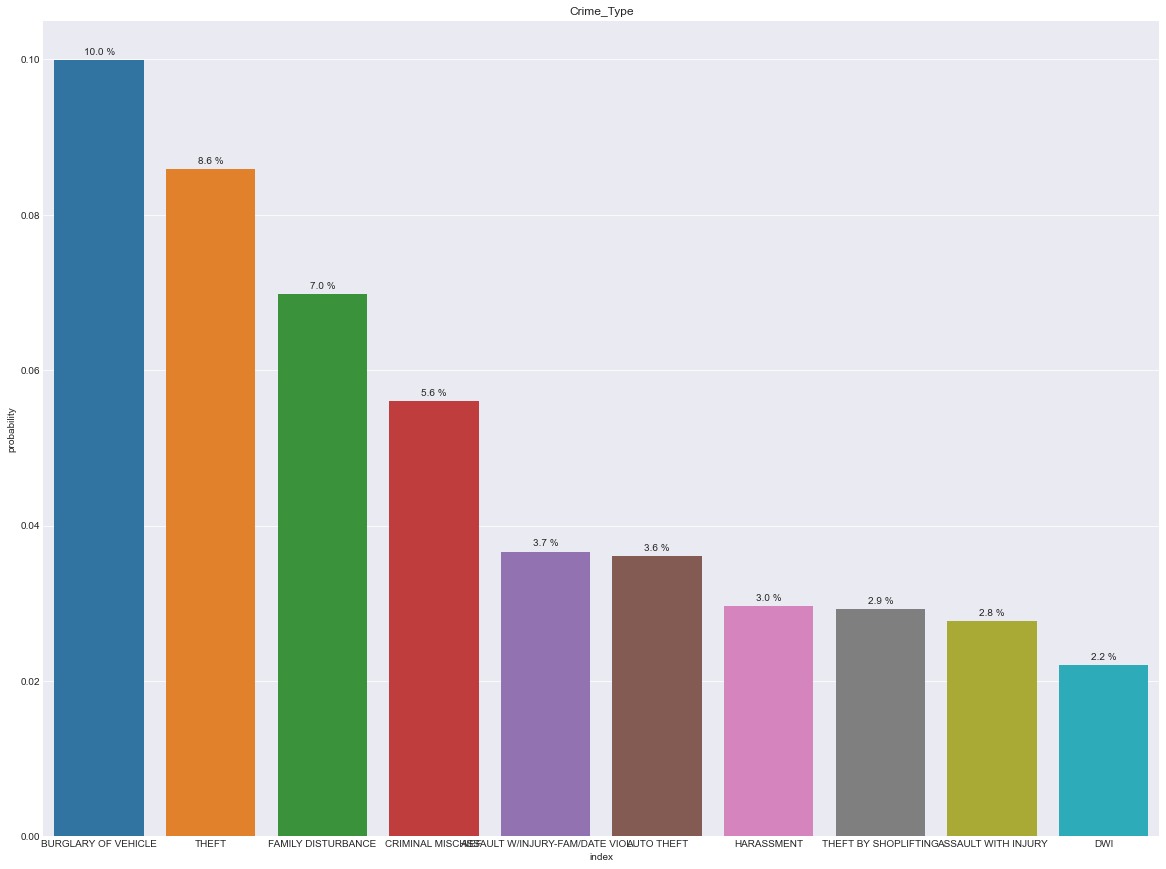

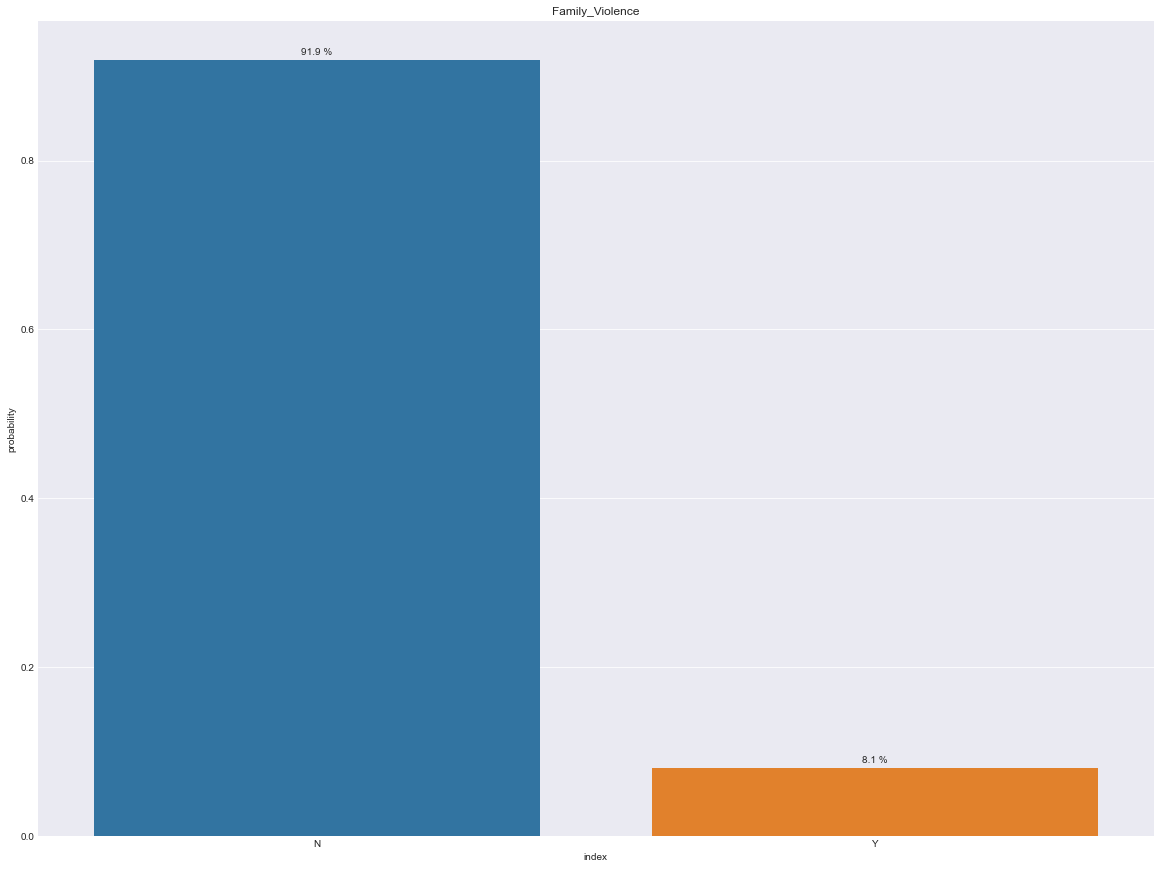

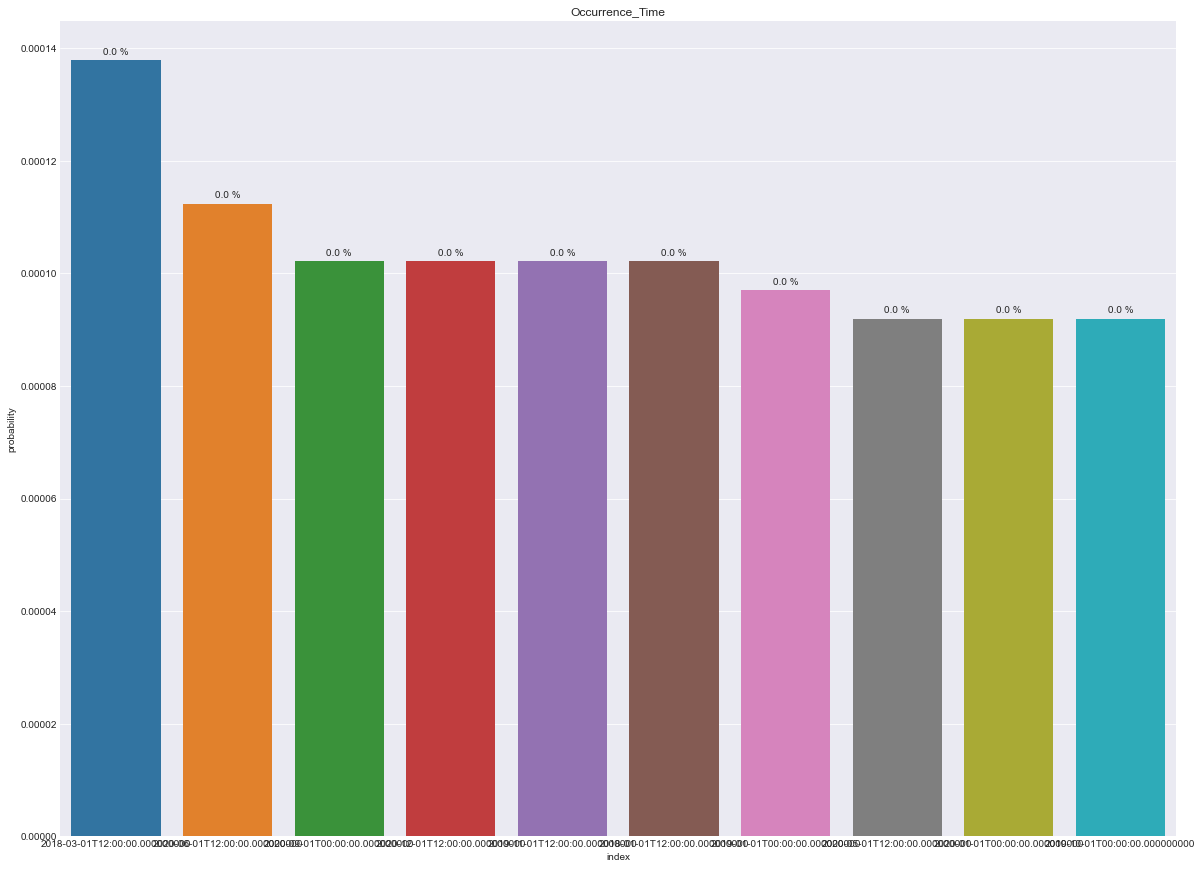

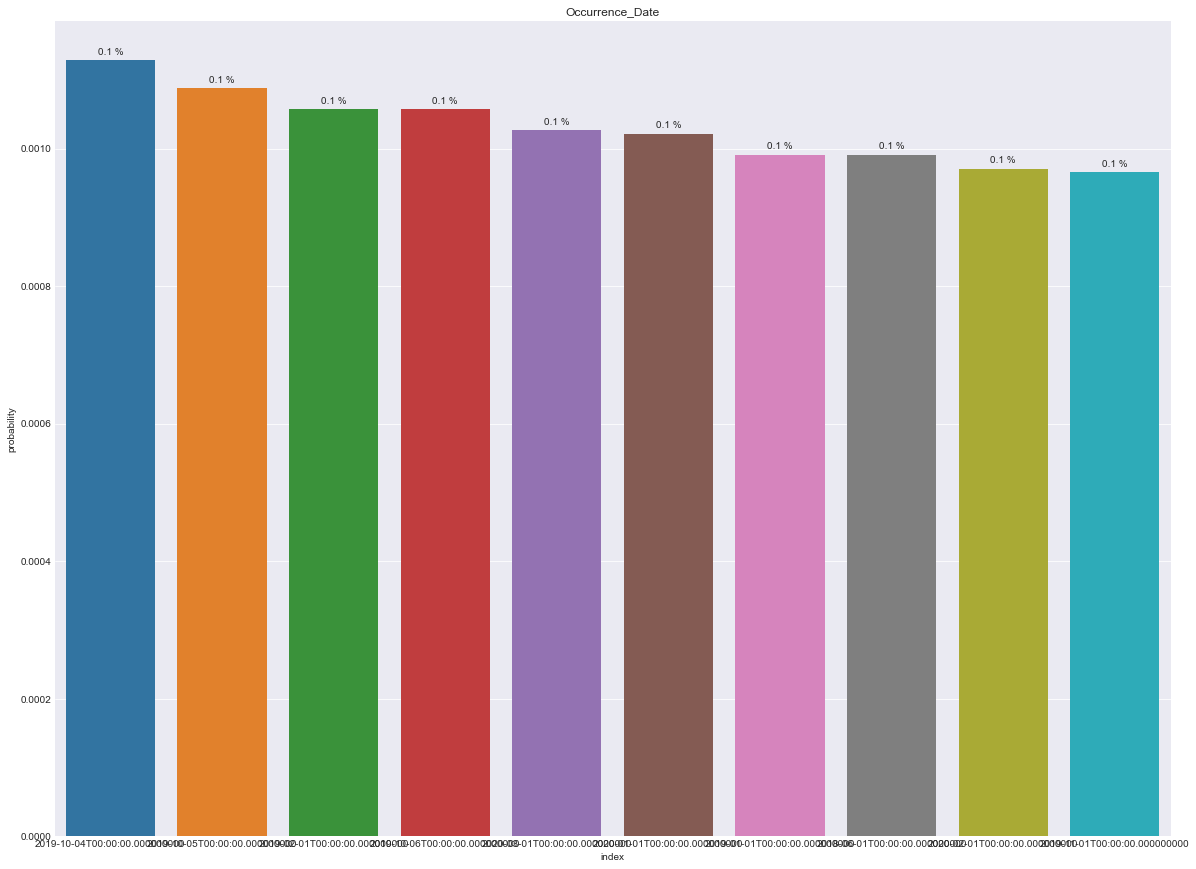

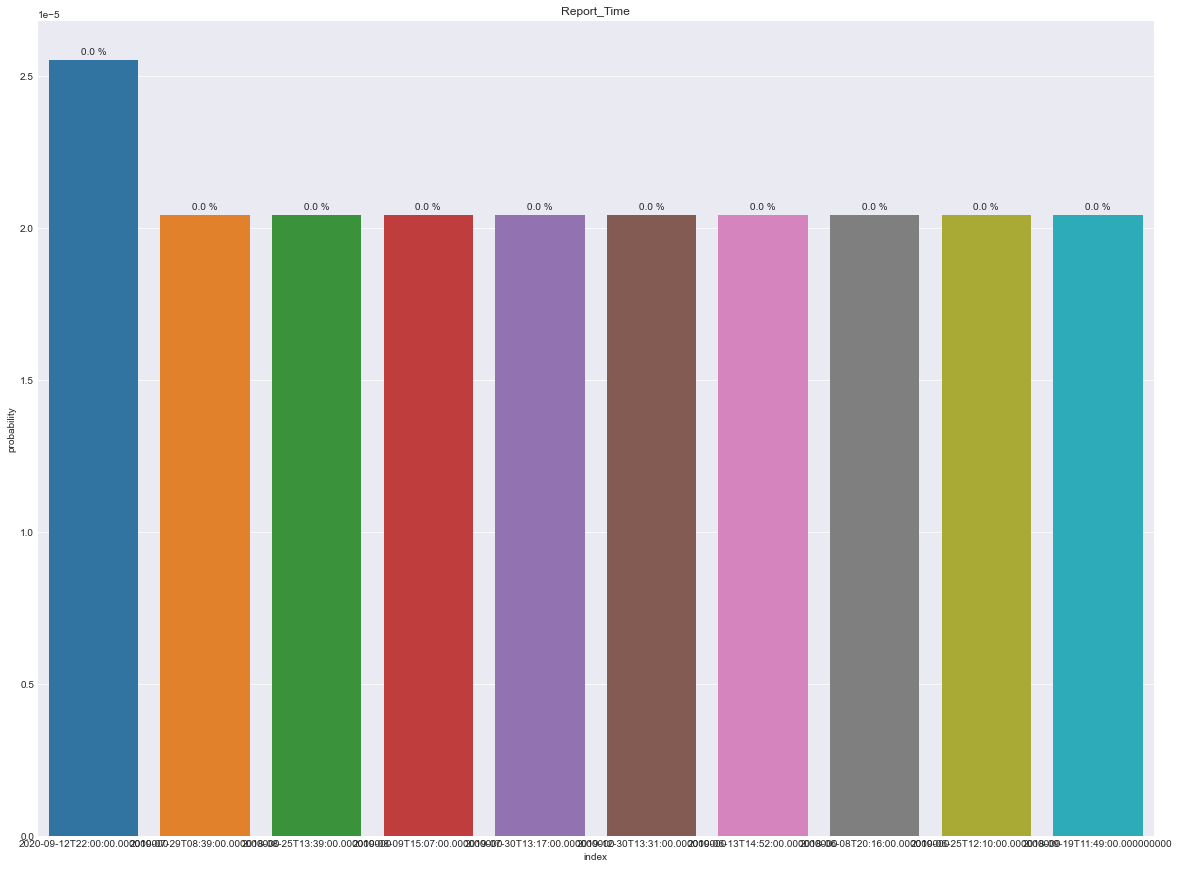

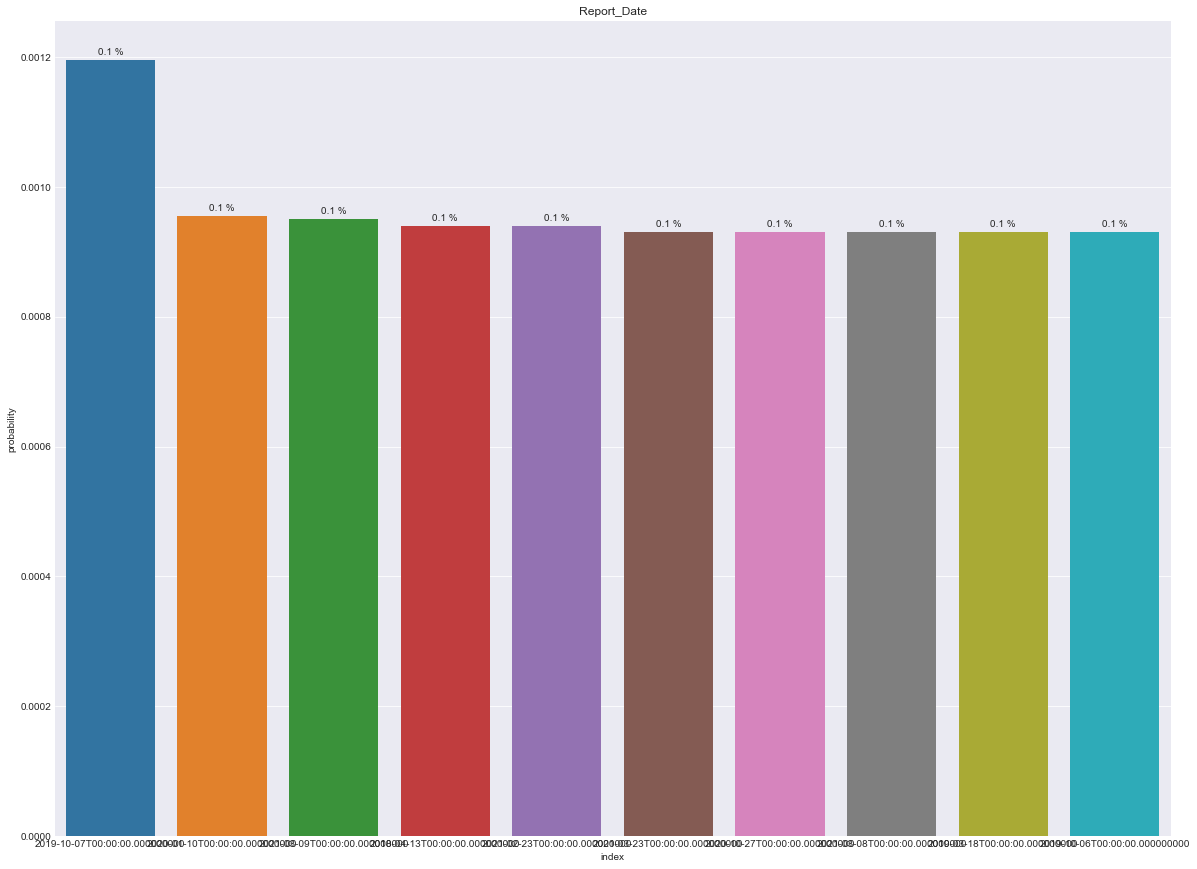

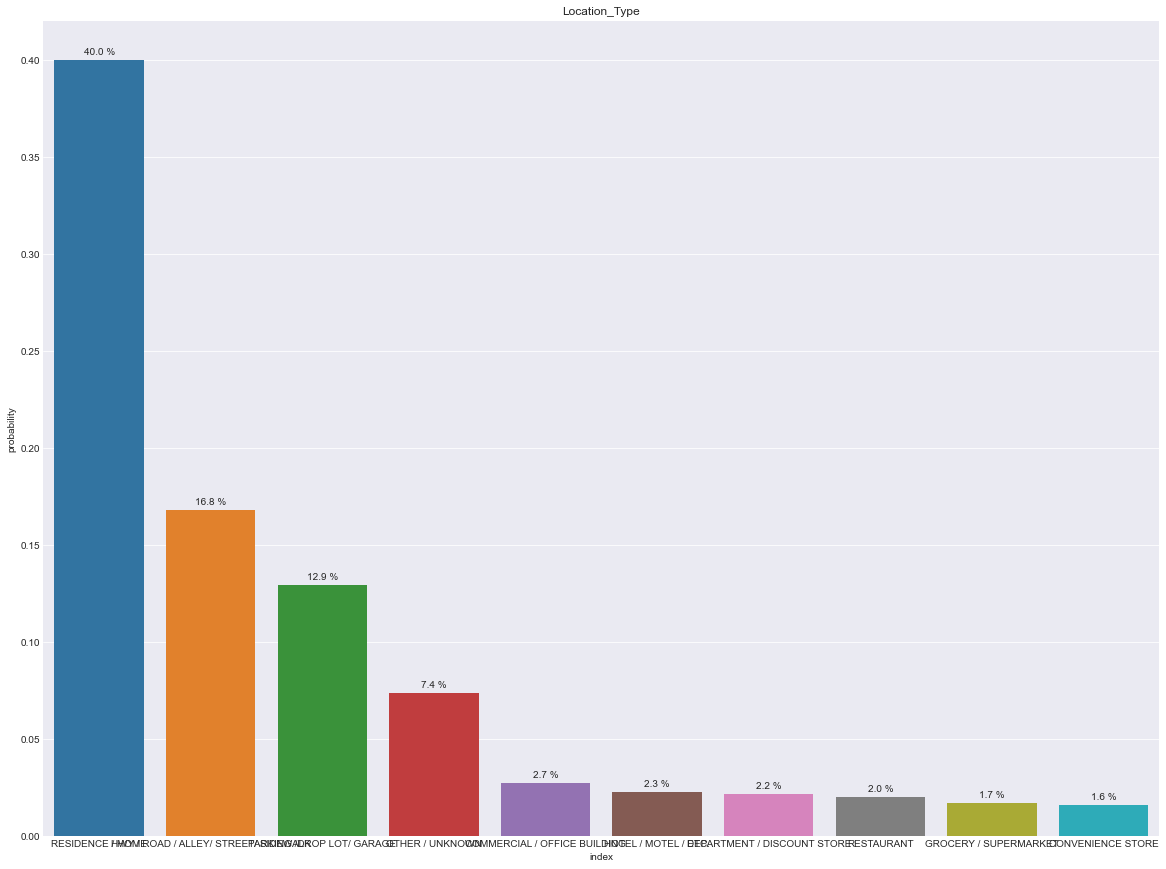

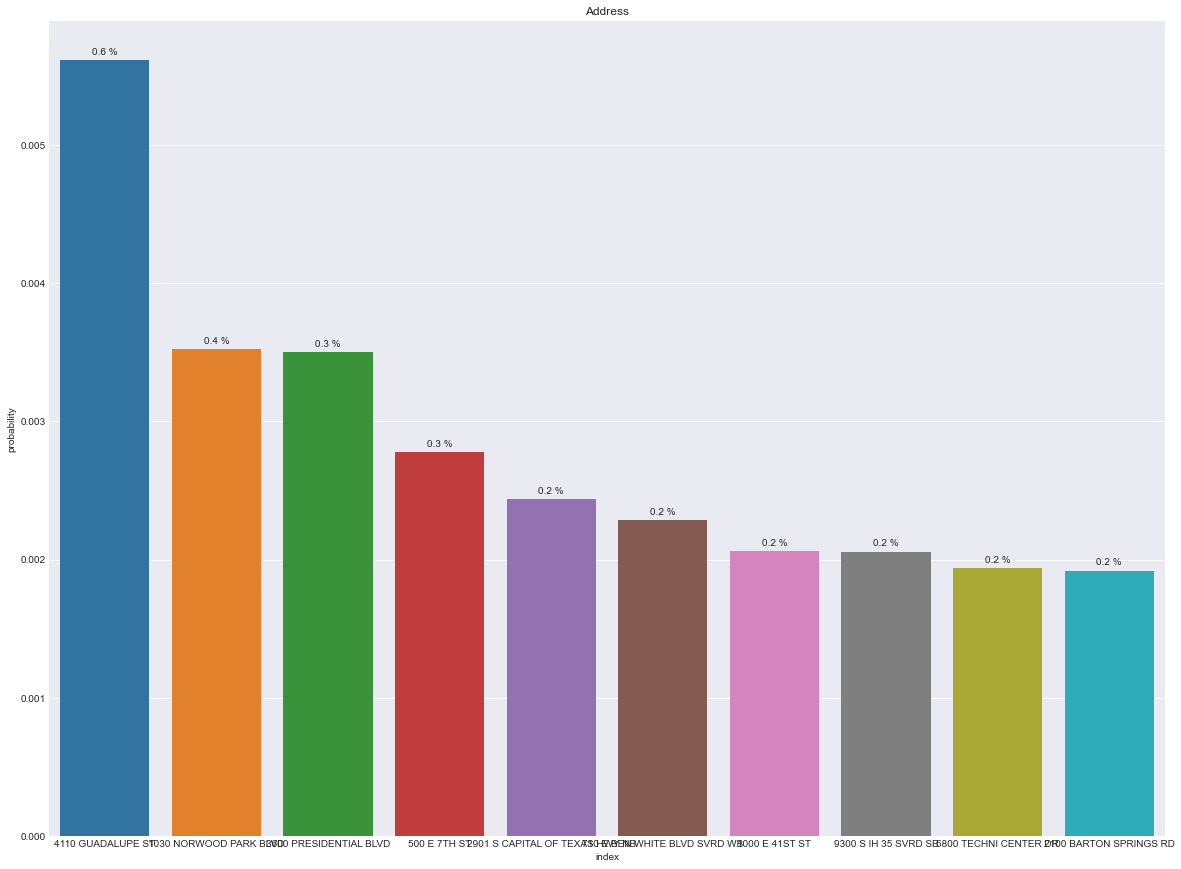

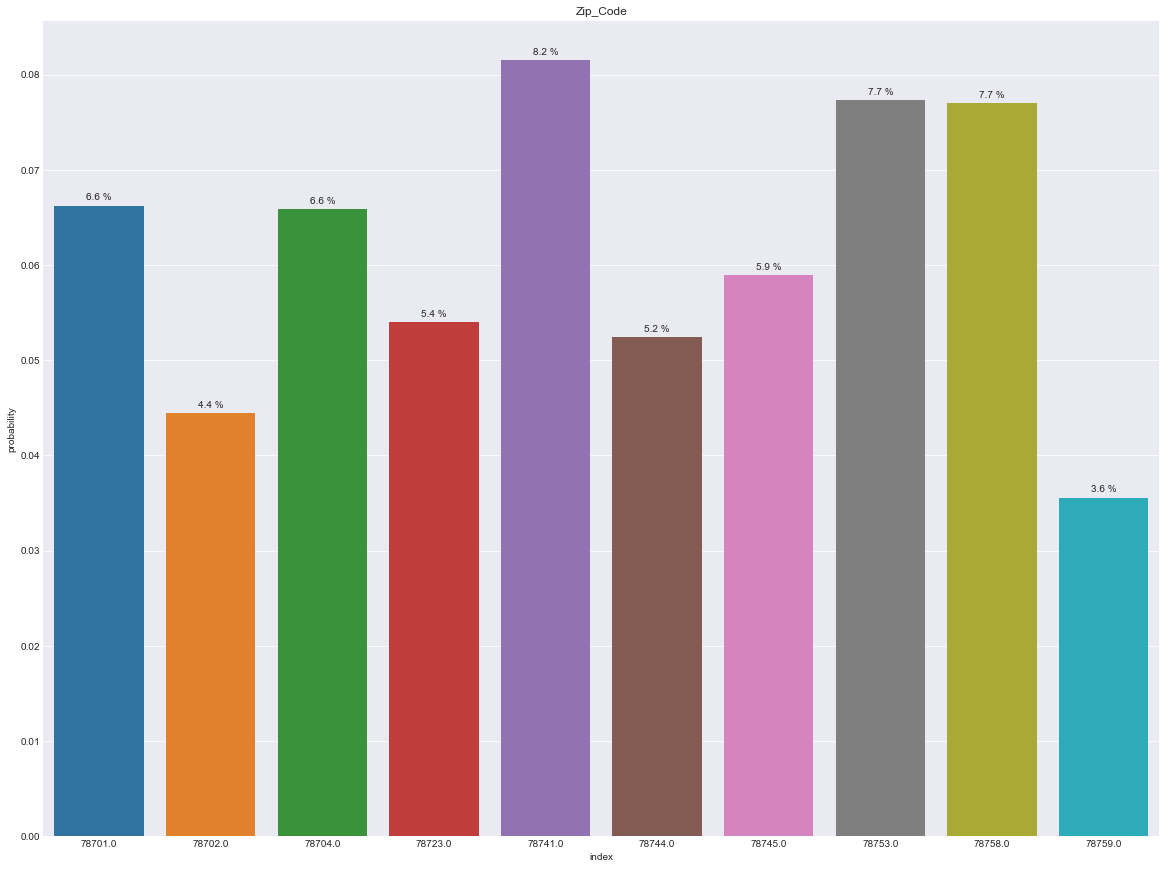

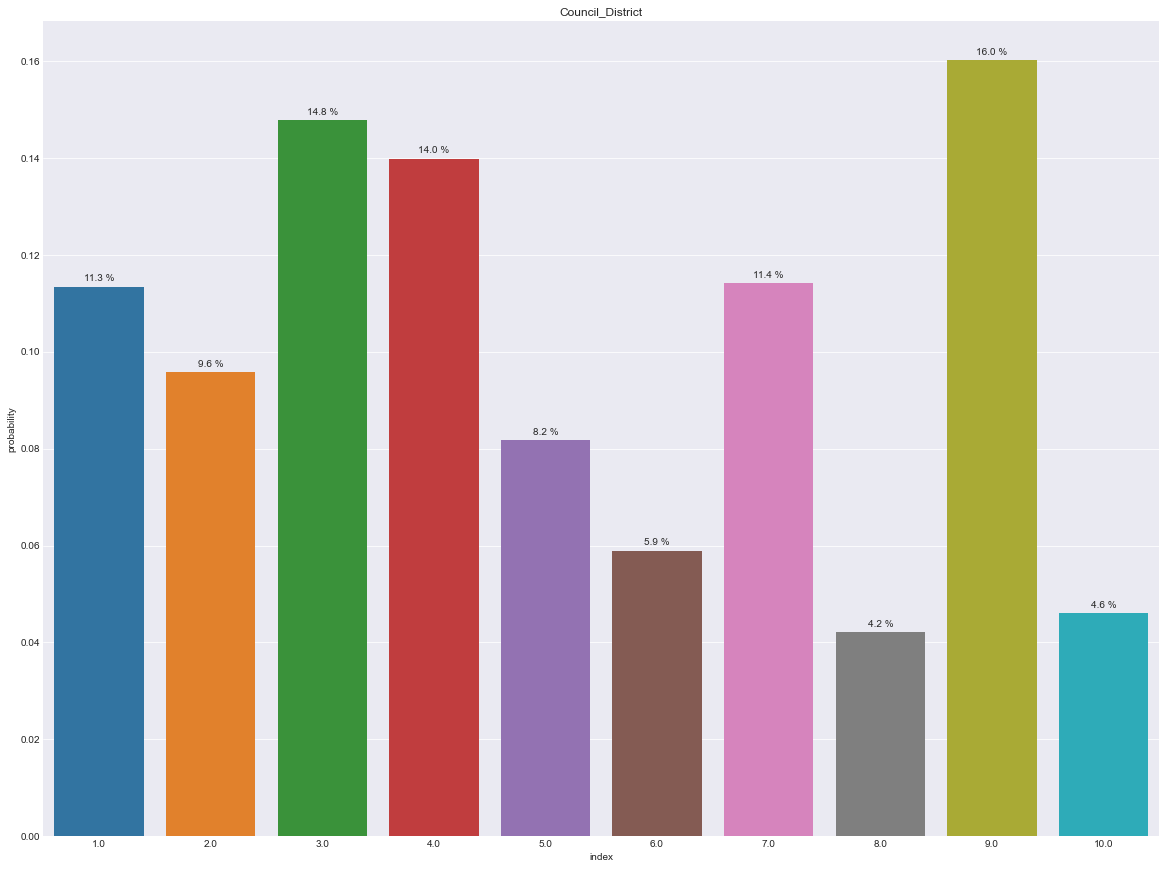

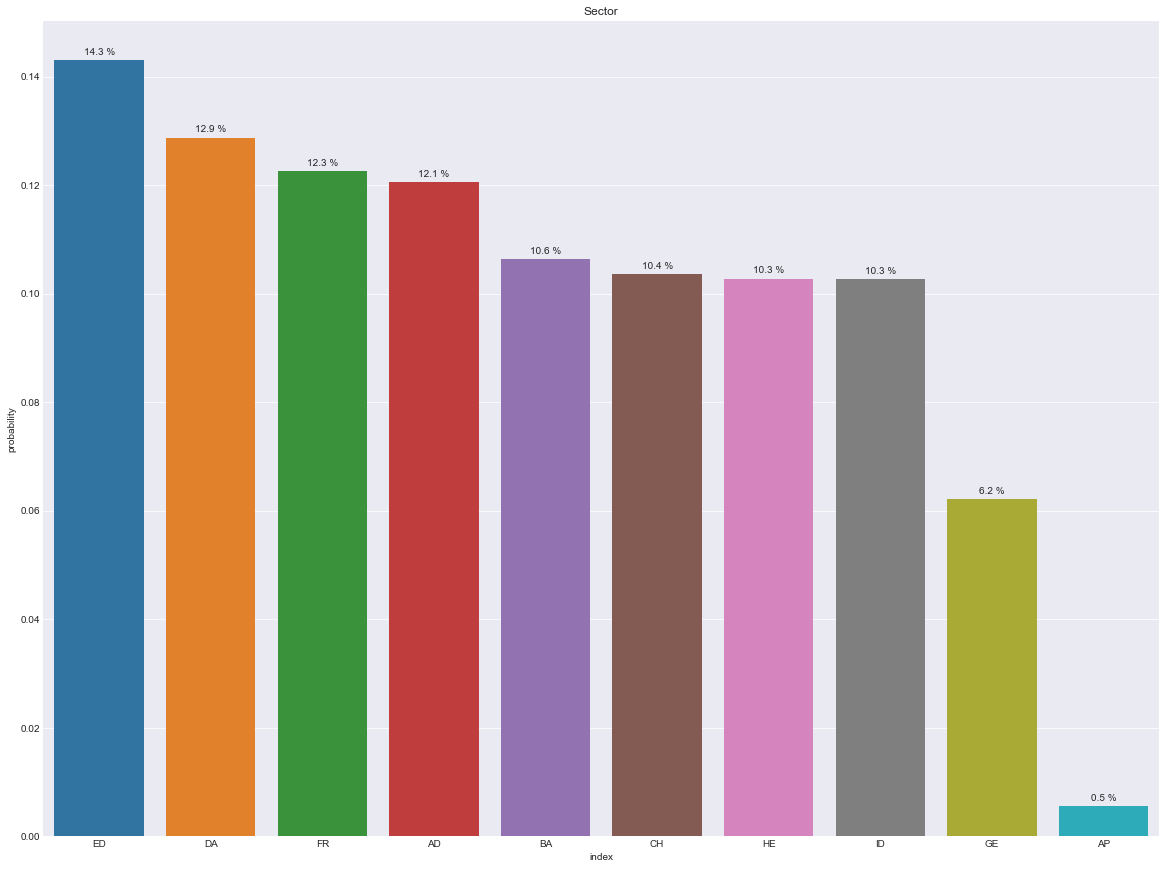

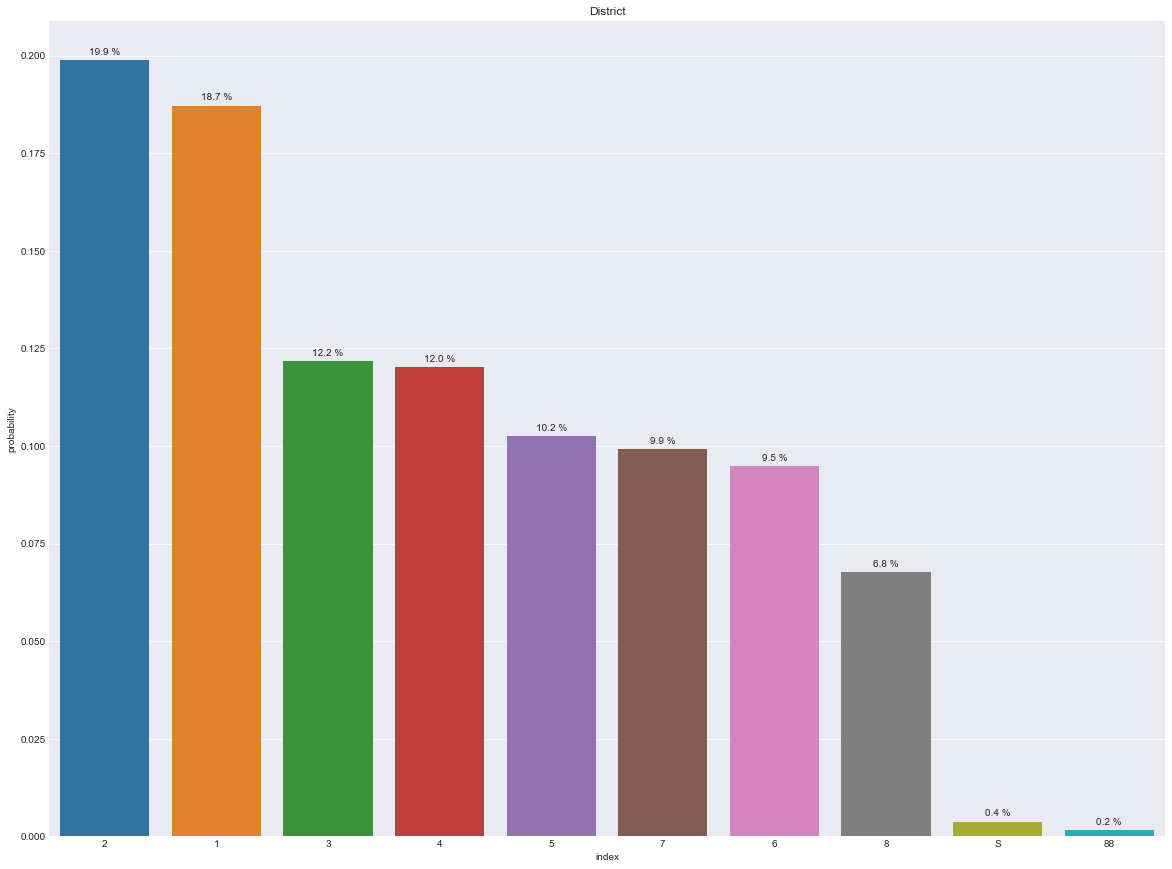

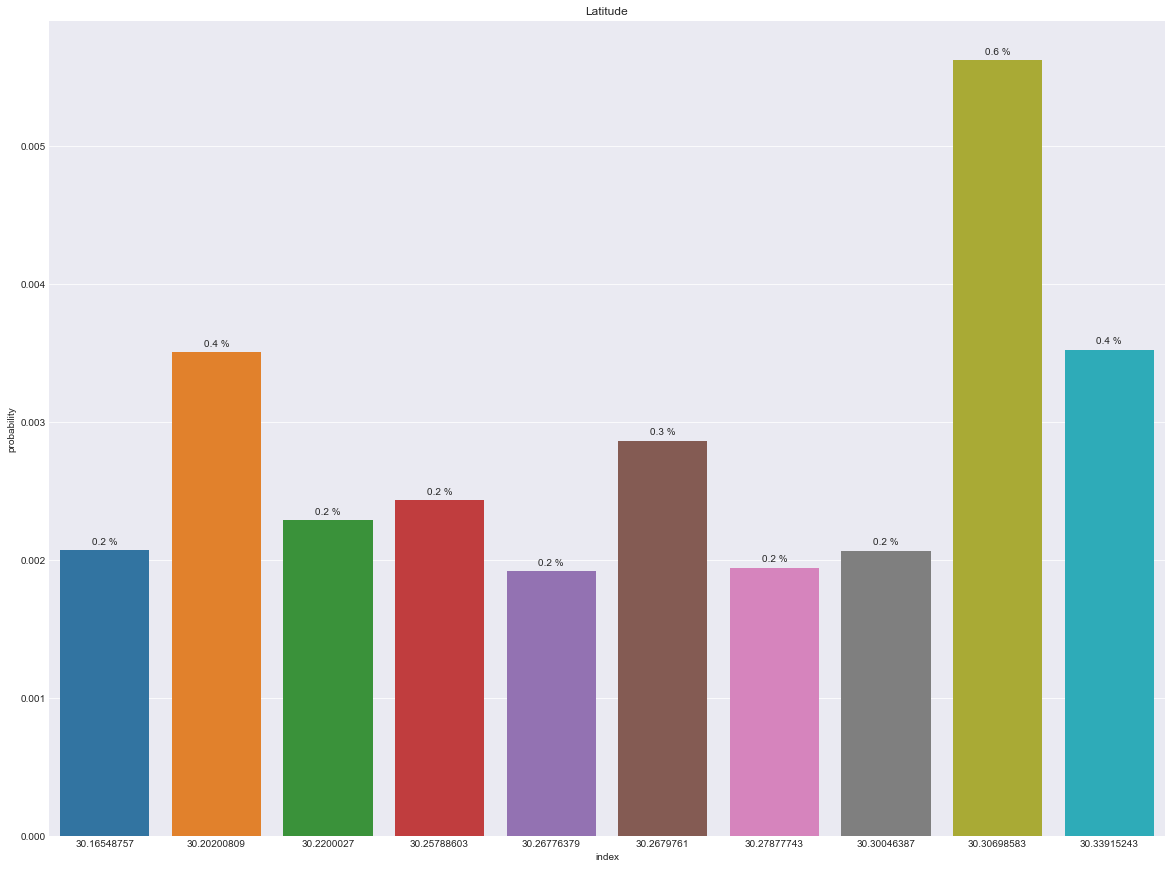

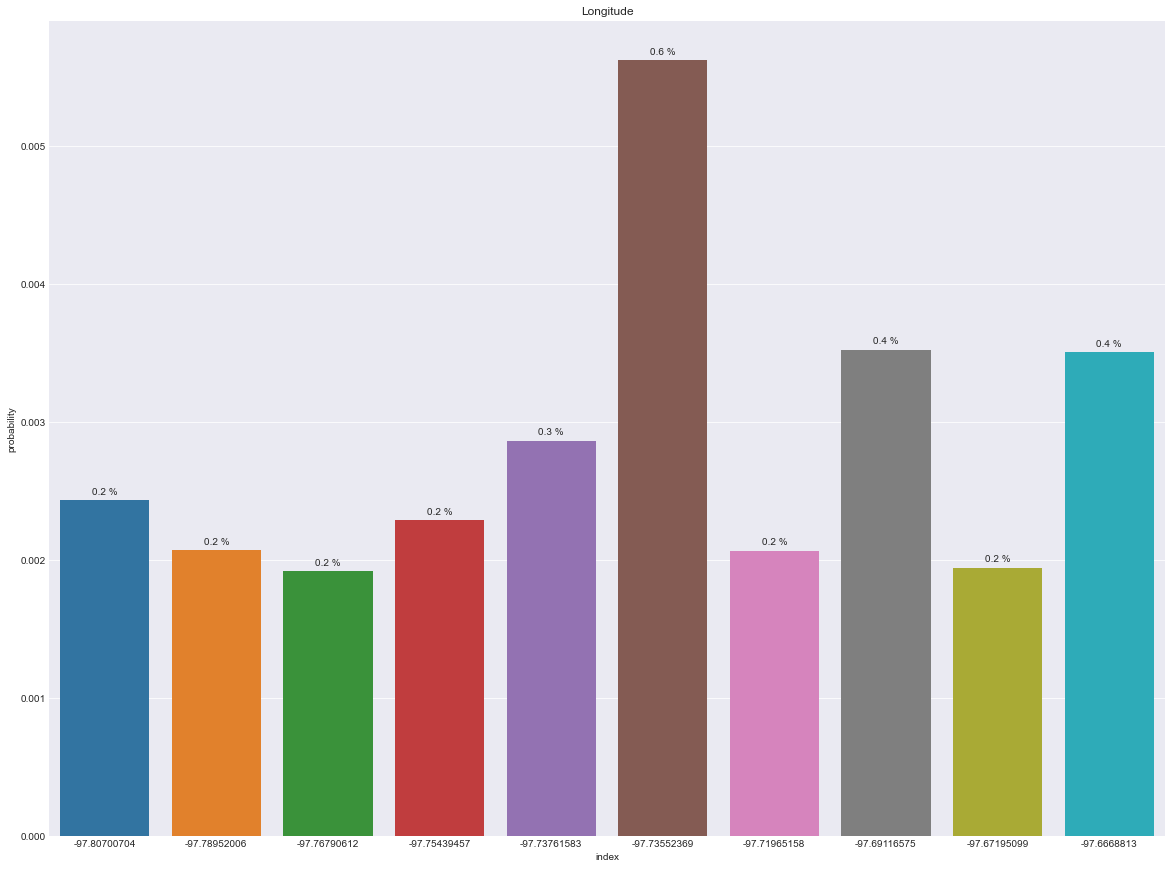

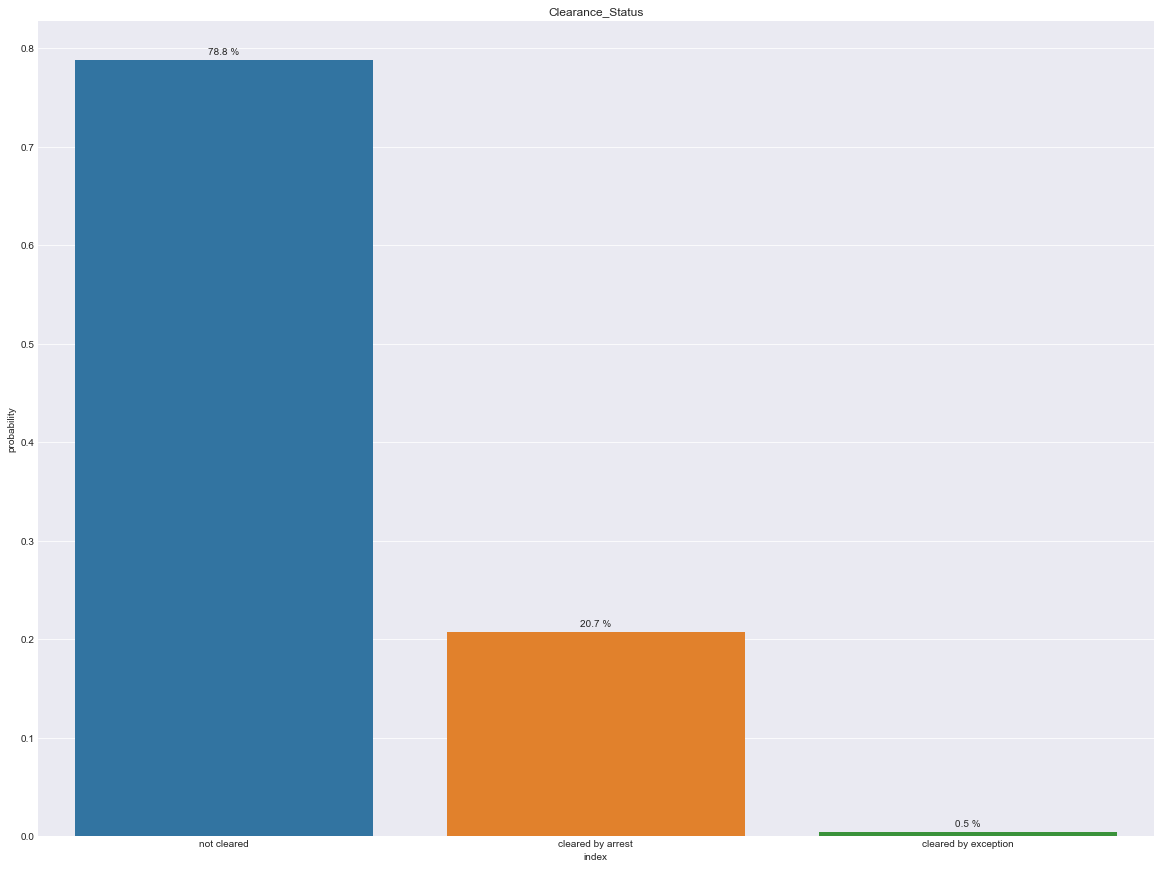

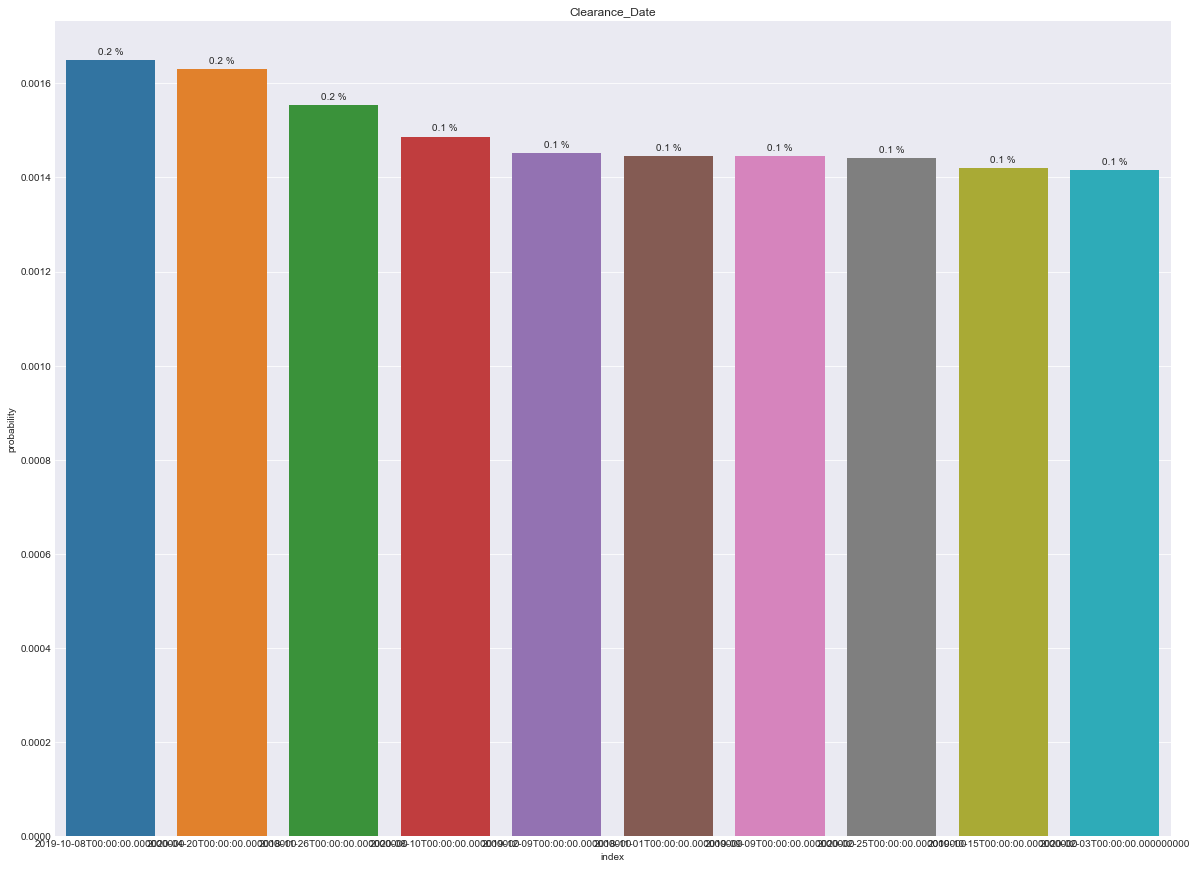

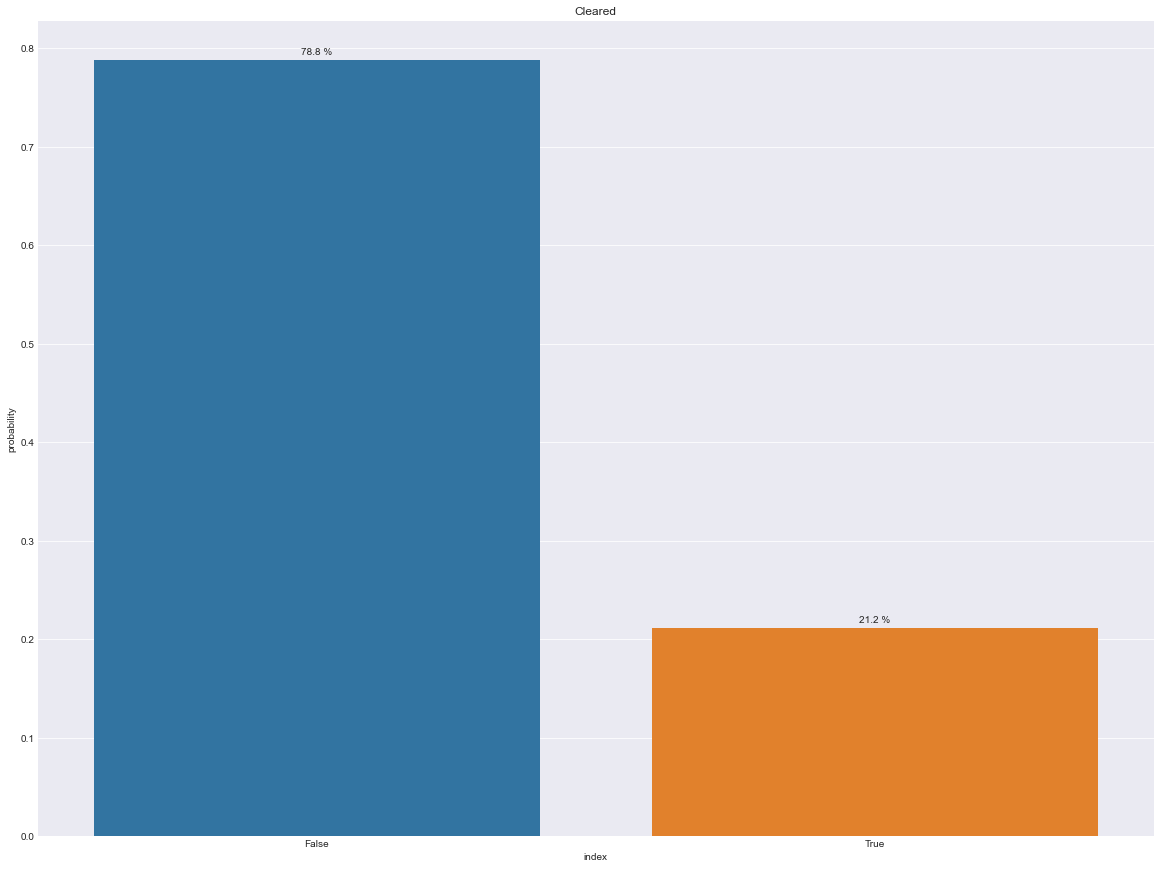

In [18]:
## Use probability to detect anomalies in our variables

for col in train.columns:
    plt.figure(figsize=(20, 15))
    splot = sns.barplot(x='index', y=col, data=train[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()


**Moving into multivariate exploration for my question.**

## Exploration

### Initial Questions to Answer

1. Which types/categories of crime are not getting solved/closed?
- After MVP, possibly drill down into specific crime descriptions.
2. Are there certain city council districts with disproportionate levels of crime?
3. Is crime seasonal? Times of the year when a crime is more prevalent? 
4. Does the difference between time of incident and report time relate to a crime being solved/closed?

*Setting my confidence level at 95% which makes my alpha = .05*


## Question 1: We predict that case clearance is dependent on the type of crime.

$H0$: Type of crime and clearance are not independent of eachother. 

$Ha$: Type of crime and and clearance are dependent on eachother.

#### Statistical Testing

In [19]:
target = train.cleared
ex.chi2(train.crime_type, target)

The chi2 value between the two variables is 103184.11014606187 and the P-Value is 0.0.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


**A Chi^2 establishes that there is a statistically signifiant dependency.**

#### Visualizations

<AxesSubplot:xlabel='crime_type', ylabel='cleared'>

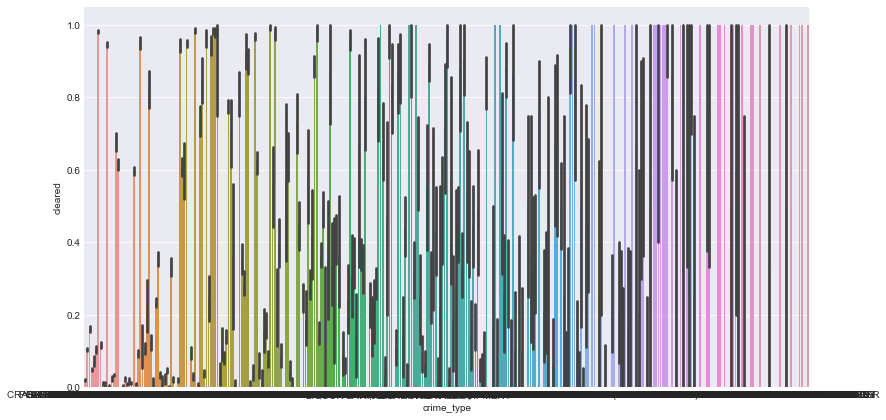

In [20]:
sns.barplot(x='crime_type', y='cleared', data= train)

**There are too many unique crime types to make sense of this. For a first iteration, I will need to only look at rows that fall within a certain threshold of obserations to reduce the types I'm looking at. I'll create a function to check value_counts that will help decide what that threshold should be.**

In [21]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [22]:
crime_type_df = value_counts_and_frequencies(train.crime_type)
crime_type_df

,count,proba
BURGLARY OF VEHICLE,19566,0.099961
THEFT,16807,0.085866
FAMILY DISTURBANCE,13669,0.069834
CRIMINAL MISCHIEF,10962,0.056004
ASSAULT W/INJURY-FAM/DATE VIOL,7173,0.036646
...,...,...
POSS OF PRESCRIPTION FORM,1,0.000005
VIOL OF COURT ORDER-NON EPO-PO,1,0.000005
VOCO AMPLIFIED MUSIC/VEHICLE,1,0.000005
DISRUPTING MEETING/PROCESSION,1,0.000005


<AxesSubplot:>

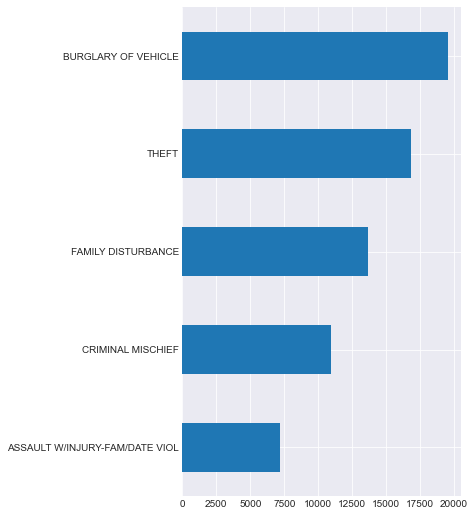

In [23]:
# Let's visualize the top 5 crime types
crime_type_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))

In [24]:
crime_type_df.tail(30)

,count,proba
ATT BURGLARY OF RESIDENCE,1,0.000005
CRIMINAL CONSPIRACY,1,0.000005
ASSAULT - SCHOOL PERSONNEL,1,0.000005
MANF CONTROLLED SUB- SYN NARC,1,0.000005
COMMERCIAL BRIBERY,1,0.000005
KIDNAPPING FAM VIO,1,0.000005
POSS OF GAMBLING PARAPHERNALIA,1,0.000005
DEL OF ALCOHOL TO MINOR,1,0.000005
SMUGGLING ILLEGAL ALIEN,1,0.000005
MANF SYNTHETIC MARIJUANA,1,0.000005


**We have quite a lot of crime types with only 1 observation. Let's look at how many crime types there are when we only look at types with more than 50 observations.**

In [25]:
crime_type_df[crime_type_df['count'] >= 50]

,count,proba
BURGLARY OF VEHICLE,19566,0.099961
THEFT,16807,0.085866
FAMILY DISTURBANCE,13669,0.069834
CRIMINAL MISCHIEF,10962,0.056004
ASSAULT W/INJURY-FAM/DATE VIOL,7173,0.036646
...,...,...
ASSAULT OF PREGNANT WM-FAM/DAT,55,0.000281
CIVIL DISTURBANCE/DEMO,55,0.000281
CRIMINAL MISCHIEF BY ARSON,54,0.000276
ABUSE OF 911,52,0.000266


*We still have 143 different crime types. Next, I'll try setting the threshold to 200.*

In [26]:
crime_type_df[crime_type_df['count'] >= 200]

,count,proba
BURGLARY OF VEHICLE,19566,0.099961
THEFT,16807,0.085866
FAMILY DISTURBANCE,13669,0.069834
CRIMINAL MISCHIEF,10962,0.056004
ASSAULT W/INJURY-FAM/DATE VIOL,7173,0.036646
...,...,...
VIOL CITY ORDINANCE - OTHER,204,0.001042
ROBBERY BY THREAT,202,0.001032
INJURY TO CHILD,202,0.001032
DOC EXPOSURE,201,0.001027


*88 crime typs is still too many to visualize. Let's try 1000 observations as the threshold.*

In [27]:
crime_type_df[crime_type_df['count'] >= 1000]

,count,proba
BURGLARY OF VEHICLE,19566,0.099961
THEFT,16807,0.085866
FAMILY DISTURBANCE,13669,0.069834
CRIMINAL MISCHIEF,10962,0.056004
ASSAULT W/INJURY-FAM/DATE VIOL,7173,0.036646
AUTO THEFT,7064,0.036089
HARASSMENT,5806,0.029662
THEFT BY SHOPLIFTING,5718,0.029213
ASSAULT WITH INJURY,5419,0.027685
DWI,4321,0.022076


*There's still 42 which is too many to visualize.*

**I think instead of a threshold, I'll limit crime types to the top 10.**

<AxesSubplot:>

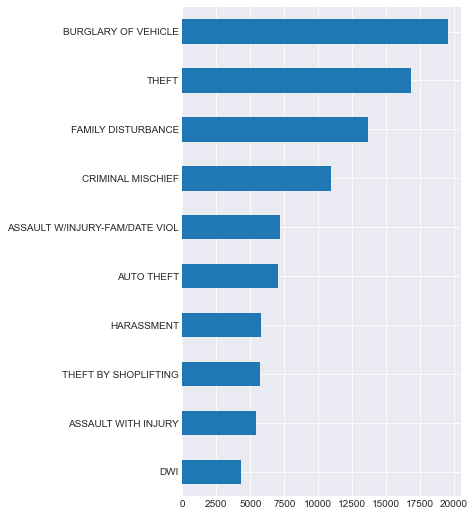

In [28]:
# Let's visualize the top 10 crime types
crime_type_df['count'].sort_values().tail(10).plot.barh(figsize=(5, 9))

**Let me use this to create a list of my top 10 crime types to use for visualizations using the train split.**

In [29]:
crime_type_df['count'].sort_values().tail(10)

DWI                                4321
ASSAULT WITH INJURY                5419
THEFT BY SHOPLIFTING               5718
HARASSMENT                         5806
AUTO THEFT                         7064
ASSAULT W/INJURY-FAM/DATE VIOL     7173
CRIMINAL MISCHIEF                 10962
FAMILY DISTURBANCE                13669
THEFT                             16807
BURGLARY OF VEHICLE               19566
Name: count, dtype: int64

In [30]:
# Create a list with the top 10 crimes
top_10_crimes = ['DWI', 'ASSAULT WITH INJURY', 'THEFT BY SHOPLIFTING', 'HARASSMENT', 
                 'AUTO THEFT', 'ASSAULT W/INJURY-FAM/DATE VIOL', 'CRIMINAL MISCHIEF', 
                 'FAMILY DISTURBANCE', 'THEFT', 'BURGLARY OF VEHICLE']

In [31]:
# Create a subsetted df that only includes the top 10 crimes
top_crimes_df = train.copy()
top_crimes_df = top_crimes_df[top_crimes_df.crime_type.isin(top_10_crimes)]
top_crimes_df.head()

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,district,latitude,longitude,clearance_status,clearance_date,cleared
256829,BURGLARY OF VEHICLE,N,2019-09-20 17:00:00,2019-09-20,2019-09-21 13:59:00,2019-09-21,RESIDENCE / HOME,4100 VICTORY DR,78704.0,5.0,DA,4,30.233936,-97.790843,not cleared,2019-09-24,False
123369,THEFT,N,2021-01-10 14:00:00,2021-01-10,2021-01-11 11:19:00,2021-01-11,OTHER / UNKNOWN,5605 SPRINGDALE RD,78723.0,1.0,CH,4,30.299307,-97.673692,not cleared,2021-01-13,False
319089,BURGLARY OF VEHICLE,N,2019-02-20 13:00:00,2019-02-20,2019-02-21 16:10:00,2019-02-21,OTHER / UNKNOWN,6200 LOYOLA LN,78724.0,1.0,CH,7,30.301611,-97.650449,not cleared,2019-02-26,False
37631,AUTO THEFT,N,2021-12-11 12:00:00,2021-12-11,2021-12-13 15:00:00,2021-12-13,PARKING /DROP LOT/ GARAGE,1300 W BEN WHITE BLVD SVRD WB,78704.0,5.0,DA,2,30.228494,-97.779854,not cleared,2021-12-16,False
221040,CRIMINAL MISCHIEF,N,2020-01-21 16:00:00,2020-01-21,2020-01-22 13:18:00,2020-01-22,PARKING /DROP LOT/ GARAGE,2800 S IH 35 SVRD SB,78704.0,9.0,DA,2,30.228454,-97.745260,not cleared,2020-01-22,False


In [32]:
# Sanity check
top_crimes_df.crime_type.value_counts().sum()

96505

In [33]:
## Set up df so that crime_types are sorted correctly
top_crimes_df = top_crimes_df.sort_values(by='cleared', ascending=False)

**Now let me use this df to visualize the top 10 crime types.**

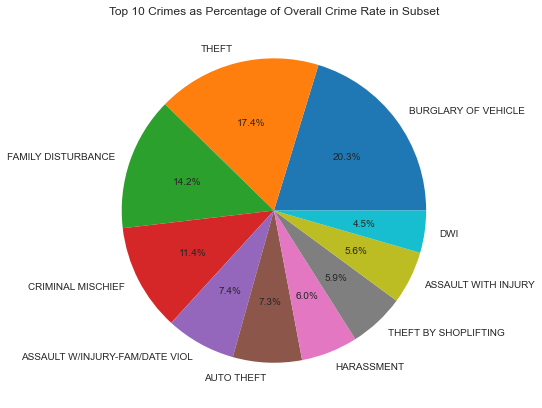

In [34]:
# create  --- This seems like a wrong way to visualize
top_crimes_df.crime_type.value_counts().plot(kind='pie', y='cleared', autopct="%1.1f%%")
# remove y axis label
plt.ylabel(None)
#add title
plt.title('Top 10 Crimes as Percentage of Overall Crime Rate in Subset')
plt.show()

**Let's visualize how crime type relates to clearance rate.**

In [35]:
# Calculate overall clearance rate
clearance_rate = train.cleared.mean()
clearance_rate

0.21170351902562634

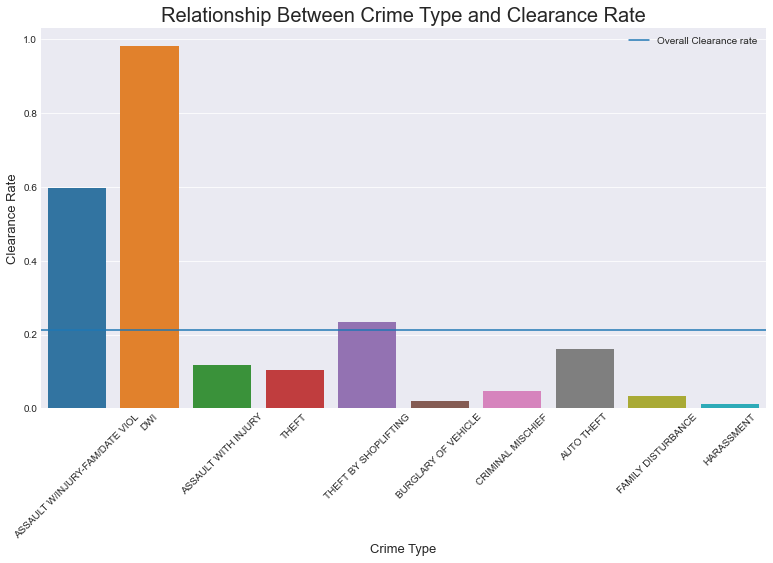

In [36]:
plt.title("Relationship Between Crime Type and Clearance Rate", fontsize=20)
sns.barplot(x="crime_type", y="cleared", data=top_crimes_df, ci=None)
plt.axhline(clearance_rate, label="Overall Clearance rate")
plt.ylabel('Clearance Rate', fontsize=13)
plt.xlabel('Crime Type', fontsize=13)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
plt.show()

**Takeaways:**
- While DWIs, are the least frequent type of crime reported, they are also the most likely crime to be cleared.
    - I would think these crimes are actually quite common. I'm surprised they make up such a small percentage but am not surprised they get caught so easily. Drunk driving likely happens very often but is only noticeable when the level of drunkenness is quite high. In those cases when it is noticeable it is very likely to be reported by a bystander and can easily be noticed by a police officer leading to an easy case closure.
- Theft by shoplifting has a clear rate that is very close to the overall rate of 21%
- The three top crimes types have very low clear rates

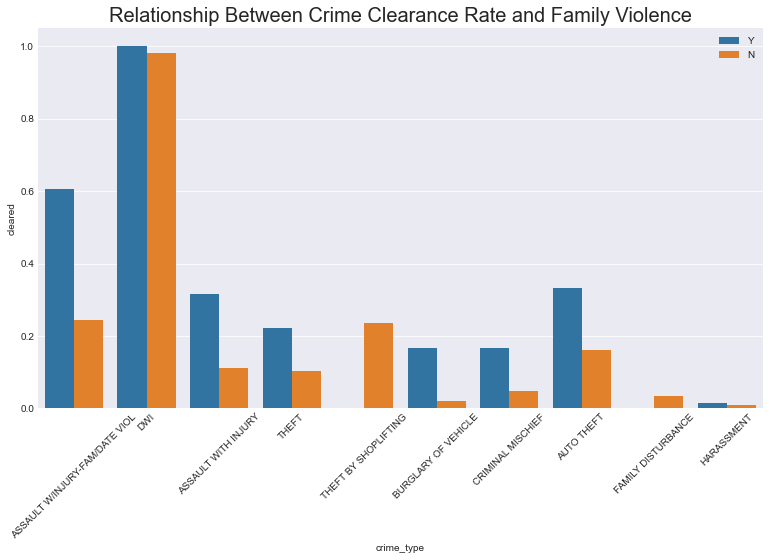

In [37]:
plt.title("Relationship Between Crime Clearance Rate and Family Violence", fontsize=20)
sns.barplot(x="crime_type", y="cleared", hue='family_violence', data=top_crimes_df, ci=None)
plt.xticks(rotation = 45) #Rotating the xticks 45 degrees for readability
plt.legend()
plt.show()

## Let's explore location_type a bit

In [ ]:
location_type_df = value_counts_and_frequencies(train.location_type)
location_type_df

In [ ]:
# Let's visualize the top 10 location types
location_type_df['count'].sort_values().tail(10).plot.barh(figsize=(5, 9))

In [ ]:
# Create a list with the top 10 locations
top_10_locations = ['RESIDENCE/HOME', 'HWY/ROAD/ALLEY/STREET/SIDEWALK', 'PARKING/DROP LOT/GARAGE', 
                 'OTHER/UNKNOWN', 'COMMERCIAL/OFFICE BUILDING', 'HOTEL/MOTEL/ETC.', 
                 'DEPARTMENT/DISCOUNT STORE', 'RESTAURANT', 'GROCERY/SUPERMARKET',
                 'CONVENIENCE STORE']

In [ ]:
# Creatae a subsetted df that only includes the top 10 crimes
top_locations_df = train.copy()
top_locations_df = top_locations_df[top_locations_df.location_type.isin(top_10_locations)]
top_locations_df.head()

In [ ]:
# Sanity check --- The list didn't work as all the values with slashes are missing
top_locations_df.location_type.value_counts()